In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a=np.array([[20,30,40,50]])
b=np.array([[30,40,50,60]])

In [ ]:
a

array([[20, 30, 40, 50]])

In [ ]:
b

array([[30, 40, 50, 60]])

In [ ]:
a.shape, b.shape

((1, 4), (1, 4))

In [ ]:
np.dot(a,b.T)

array([[6800]])

Linear Regression

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/ageandheight.csv', index_col = 0)
data


,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [ ]:
def graph_plot(b0, b1):
  plt.scatter(data.Age, data.Height)
  plt.xlabel('Ages')
  plt.ylabel('Height')
  plt.plot(list(range(-1,20)),[b0 + b1 *x for x in range(-1,20)],color='red')

In [ ]:
def loss_function(b0, b1):
  total_loss = 0
  for i in range(len(data)):
    x = data.loc[i].Age
    y = data.loc[i].Height
    y_cap = b0+b1*x
    loss = (y-y_cap)**2
    total_loss+=loss
  return total_loss/len(data)

In [ ]:
loss_function(0,0)

2227.126576529354

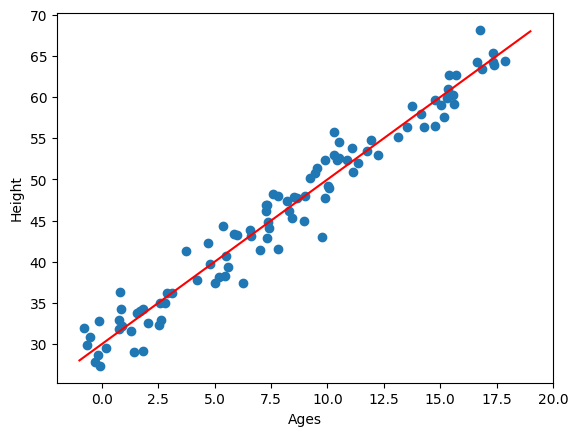

In [ ]:
graph_plot(30, 2)

In [ ]:
loss_function(30, 2)

4.672583849579184

In [ ]:
loss_function(30,2)
loss=[]

In [ ]:
a.shape

(1, 4)

In [ ]:
def gradient_descent_new(X, y, b0, b1, L=0.01):
  num, features = X.shape
  y_cap = np.dot(X, b1)+b0
  error=y-y_cap
  loss=(np.sum(np.square(error)))/num
  b1_gradient=(-(2/num) * (np.matmul(X.T,error)))
  b0_gradient=-(2/num) * np.sum(error)
  b1_new = b1 - b1_gradient * L
  b0_new = b0 - b0_gradient * L
  return b0_new,b1_new

In [ ]:
X = data['Age'].to_numpy().reshape(-1, 1)
y = data['Height'].to_numpy().reshape(-1, 1)

In [ ]:
X.shape[1]

1

In [ ]:
def gradient_descent(b0,b1,L=0.01):
  b1_gradient = 0
  b0_gradient = 0
  n = len(data)
  for i in range(n):
    x = data.loc[i].Age
    y = data.loc[i].Height
    b1_gradient += - (2/n) * x * (y - (b1 * x + b0))
    b0_gradient += - (2/n) * (y - (b1 *x+ b0))
  print(b1_gradient)
  b1_new = b1 - b1_gradient * L
  b0_new = b0 - b0_gradient * L
  loss.append(loss_function(b0_new,b1_new))
  return b0_new,b1_new

30.138136682479576 [[1.9855967]]


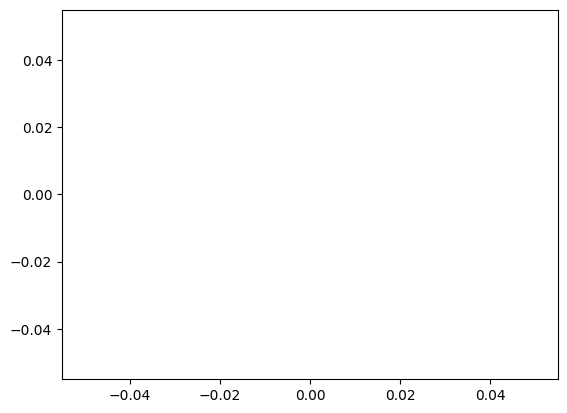

In [ ]:
b0=0
b1=np.zeros((X.shape[1],1))
loss=[]
for i in range(10000):
  b0,b1=gradient_descent_new(X,y,b0,b1)
print(b0,b1)
plt.plot(loss)
plt.show()

-843.5166732437126
714.6917064096391
-600.1951234911196
509.3335020018492
-426.94189377216145
363.1017535871328
-303.5811519150923
258.9714033488263
-215.7465808747559
184.81965976858828


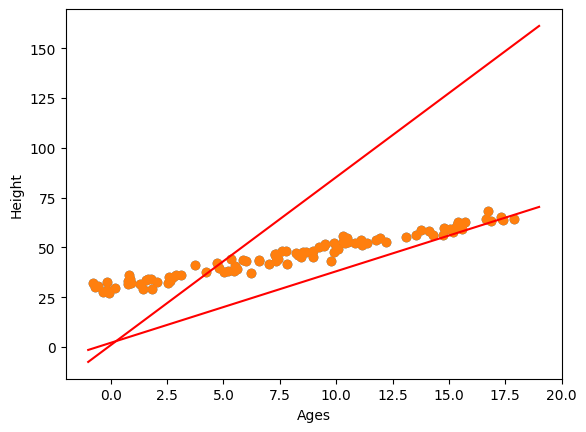

In [ ]:
b0=0
b1=0
loss=[]
# print(b0,b1,"Loss Function:",loss_function(b0,b1))
for i in range(10):
  b0,b1=gradient_descent(b0,b1)
  if (i % 100 ==0):
    # print(b0,b1,"Loss Function:",loss_function(b0,b1))
    graph_plot(b0,b1)
graph_plot(b0,b1)
plt.show()
# plt.plot(loss)
# plt.show()

In [ ]:
x_new = 12.5
pred = b0+b1*x_new
print(pred)

46.970020667036515


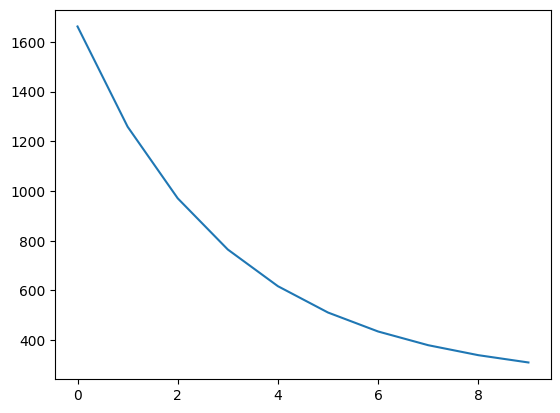

In [ ]:
plt.plot(loss)

Linear Regression using scikitlearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
data.Age.to_numpy().reshape((-1, 1)).shape

(100, 1)

In [ ]:
reg = LinearRegression()
reg.fit(data.Age.to_numpy().reshape((-1,1)),data.Height)

LinearRegression()

In [ ]:
reg.coef_

array([1.9855967])

In [ ]:
reg.intercept_

30.138136682479868

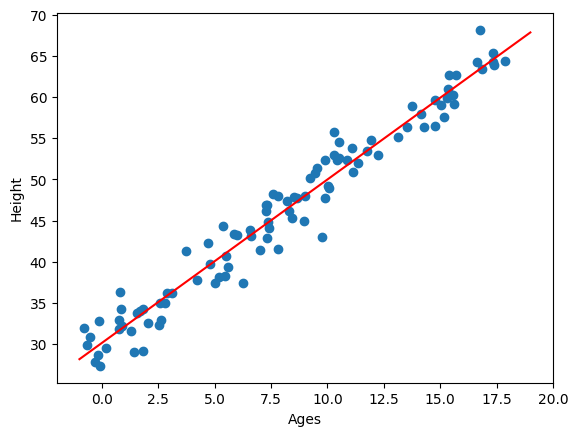

In [ ]:
graph_plot(reg.intercept_, reg.coef_)

In [ ]:
reg.predict([[12.5]])



array([54.95809549])